## 훈련 세트와 테스트 세트 

In [33]:
import pandas as pd
import numpy as np

In [34]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [35]:
fish_data = np.column_stack((fish_length,fish_weight))

In [36]:
fish_data[:5]

array([[ 25.4, 242. ],
       [ 26.3, 290. ],
       [ 26.5, 340. ],
       [ 29. , 363. ],
       [ 29. , 430. ]])

In [37]:
fish_target = np.concatenate((np.ones(35),np.zeros(14)))

In [38]:
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [39]:
from sklearn.model_selection import train_test_split

In [51]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify = fish_target, random_state = 42)

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
kn = KNeighborsClassifier()

In [54]:
kn.fit(train_input,train_target)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [55]:
kn.score(test_input,test_target)

1.0

In [56]:
kn.predict([[25, 150]])

array([0.])

In [57]:
import matplotlib.pyplot as plt

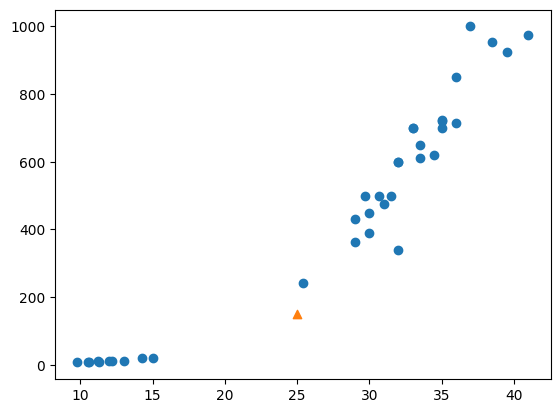

In [58]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker = "^")
plt.show()

In [59]:
distances, indexes = kn.kneighbors([[25, 150]])

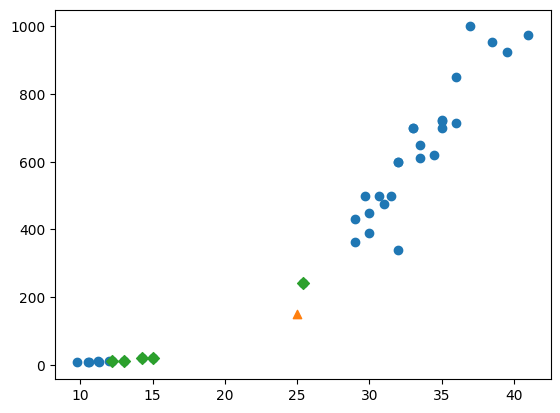

In [60]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker = "^")
plt.scatter(train_input[indexes,0], train_input[indexes, 1], marker="D")
plt.show()

In [61]:
print(train_input[indexes],'\n\n')
print(train_target[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]] 


[[1. 0. 0. 0. 0.]]


In [62]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


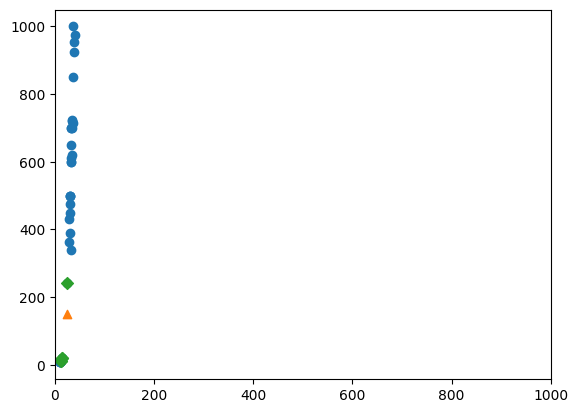

In [64]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25, 150, marker = "^")
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker = "D")
plt.xlim((0,1000))
plt.show()

##### 스케일 차이(데이터를 표현하는 기준이 다름)로 데이터를 올바르게 예측할 수 없음
* 특성값을 일정한 기준으로 맞추는 정규화 사용
* 가장 널리 사용하는 방법은 표준점수(z-score)
* 표준점수는 각 특성값이 평균에서 표준편차의 몇 배만큼 떨어져 있는지 표현
* 평균을 빼주고 표준편차로 나눈다

In [65]:
mean = np.mean(train_input, axis = 0)
std = np.std(train_input, axis = 0)

In [66]:
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [67]:
train_scaled = (train_input - mean) / std

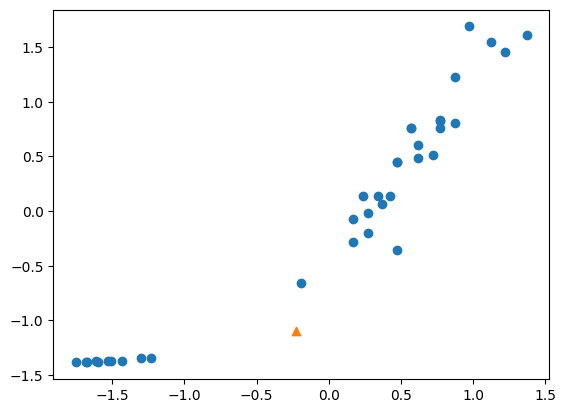

In [68]:
new = ([25,100] - mean) / std
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0], new[1], marker = "^")
plt.show()

In [69]:
kn.fit(train_scaled,train_target)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [ ]:
test_scaled = (test_input - mean) / std

In [71]:
kn.score(test_scaled, test_target)

1.0